<a href="https://colab.research.google.com/github/Shrez7961/Fare-Price-Prediction/blob/main/Fare_Amount_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset “trips.csv” contains the following fields:


key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged


– 
### **You need to analyse the data and create an efficient model that will estimate the fare prices accurately** 


In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
# Importing required modules and loading dataset
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid",{'grid.linestyle': '--'})


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [290]:
df=pd.read_csv("/content/drive/MyDrive/ALMABETTER/AlmaX Assignments/Mini Projects/trip.csv")

df.head(10)

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [292]:
df2 = df.copy()

In [293]:
df2.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [294]:
df2 = df2[df2["fare_amount"]>0]

In [295]:
df2.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999780e+05,199978.000000,199978.000000,199978.000000,199977.000000,199977.000000,199978.000000
mean,2.771229e+07,11.362649,-72.527851,39.935999,-72.526243,39.924410,1.684480
std,1.601400e+07,9.897079,11.437257,7.720443,13.115114,6.793438,1.385974
min,1.000000e+00,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382519e+07,6.000000,-73.992065,40.734795,-73.991407,40.733825,1.000000
50%,2.774518e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155540e+07,12.500000,-73.967155,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [296]:
df2=df2[df2['passenger_count']<7]

In [297]:
df2=df2.loc[(df2['pickup_longitude']>-180) & (df2['pickup_longitude']<180)]

In [298]:
df2=df2.loc[(df2['pickup_latitude']>-90) & (df2['pickup_latitude']<90)]

In [299]:
df2=df2.loc[(df2['dropoff_longitude']>-180) & (df2['dropoff_longitude']<180)]

In [300]:
df2=df2.loc[(df2['dropoff_latitude']>-90) & (df2['dropoff_latitude']<90)]

In [301]:
df2.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999640e+05,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000
mean,2.771259e+07,11.362542,-72.501989,39.918044,-72.512550,39.922546,1.683458
std,1.601405e+07,9.897195,10.449287,6.130108,10.408993,6.116060,1.306932
min,1.000000e+00,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,1.382528e+07,6.000000,-73.992065,40.734792,-73.991407,40.733825,1.000000
50%,2.774550e+07,8.500000,-73.981822,40.752590,-73.980092,40.753042,1.000000
75%,4.155571e+07,12.500000,-73.967155,40.767157,-73.963659,40.768000,2.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000


In [302]:
df2 = df2.dropna()

In [303]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199964 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              199964 non-null  int64  
 1   key                199964 non-null  object 
 2   fare_amount        199964 non-null  float64
 3   pickup_datetime    199964 non-null  object 
 4   pickup_longitude   199964 non-null  float64
 5   pickup_latitude    199964 non-null  float64
 6   dropoff_longitude  199964 non-null  float64
 7   dropoff_latitude   199964 non-null  float64
 8   passenger_count    199964 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [304]:
df2.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [305]:
df2['pickup_datetime'] = df2['pickup_datetime'].apply(lambda x:dt.strptime(x, "%Y-%m-%d %H:%M:%S UTC"))
df2['time'] = df2['pickup_datetime'].dt.hour

In [306]:
df2.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,17


## **EDA....**

We can see here the fare amount in the morning 4 to 5 am is relatively high. That may be due to less availability of taxies.

In [307]:
# Lets create a list of dependent and independent variable:
idv =['time','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
dv = ['fare_amount']

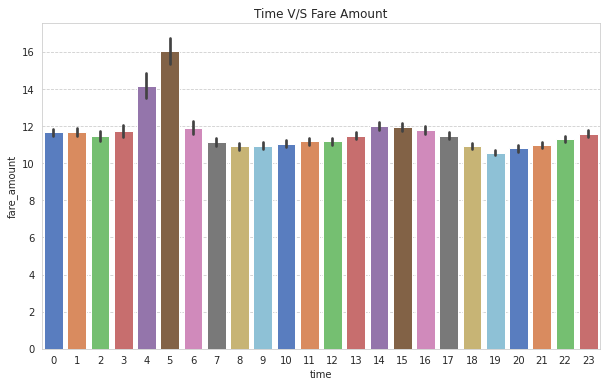

In [308]:

plt.figure(figsize=(10,6))
plt.title("Time V/S Fare Amount")
sns.barplot(x=df2.time,y= df2.fare_amount ,palette="muted") 
plt.show()

In [309]:
df2.columns

Index(['index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'time'],
      dtype='object')

In [310]:
from geopy import distance


# applies the distance function as described in the provided link
df2['km'] = df2.apply(lambda x: distance.distance((x[5], x[4]), (x[7], x[6])), axis=1)
df2.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,19,1.6811107421764293 km
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,20,2.4543632395347106 km
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,21,5.039602684044266 km
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,8,1.6614415240641573 km
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,17,4.483730087177181 km


In [ ]:
df2['km'].describe()